# **`BTU's Educational Program Women in AI - Final Group Project`**

***Creating Machine Learning Model to Predict Cancer Diagnosis***


> რუსუდან სეთურიძე

> თათია წიკლაური

> მზექალა რომანაძე

პარტნიორი კომპანიის მიერ მოწოდებულია პაციენტების პროფილების ბაზა "სიმსივნის პრედიქციის მონაცემთა ბაზა.xlsx".

**დავალება**:

მოცემული მონაცემთა ბაზის გამოყენებით, თქვენი მიზანია მანქანური სწავლების მოდელის შექმნა, რომელიც განახორციელებს დიაგნოზის - სიმსივნის პროგნოზირებას. კერძოდ, თქვენი ამოცანაა:

1. თანდართული მონაცემთა ფაილის ანალიზი;
2. ML მოდელის შექმნა;
3. დატრენინგებული მოდელის შეფასება.

**მონაცემთა ფაილი შედგება 9 სვეტისგან:**
- **ასაკი** - პაციენტის ასაკი წლებში ;
- **ბიოლოგიური გენდერი** - პაციენტის ბიოლოგიური გენდერი. 0 მიუთითებს
მამრობით სქესს და 1 მიუთითებს მდედრობითს (0=კაცი; 1=ქალი);
- **BMI** - პაციენტის სხეულის მასის ინდექსი;
- **მწეველი** - არის თუ არა პაციენტი მწეველი. 0 მიუთითებს არამწეველს და 1
მიუთითებს მწეველს (0=არამწეველი; 1=მწეველი);
- **გენეტიკური რისკი** - პაციენტის კიბოს გენეტიკური რისკის დონე, 0 მიუთითებს
დაბალზე, 1 მიუთითებს საშუალოზე და 2 მიუთითებს მაღალზე (0=დაბალი;
1=საშუალო; 2=მაღალი);
- **ფიზიკური აქტივობა** - პაციენტის მიერ კვირაში ფიზიკურ აქტივობებზე
დახარჯული საათების რაოდენობა;
- **ალკოჰოლის მიღების დონე** - პაციენტის მიერ კვირაში მოხმარებული
ალკოჰოლის ერთეულების რაოდენობა;
- **სიმსივნის ისტორია** - აქვს თუ არა პაციენტს სიმსივნის პირადი ისტორია, სადაც
0 მიუთითებს, რომ არ აქვს და 1 მიუთითებს, რომ აქვს (0=არ აქვს; 1=აქვს);
- **დიაგნოზი** - პაციენტის სიმსივნის დიაგნოზის სტატუსი, სადაც 0 მიუთითებს
სიმსივნის არარსებობაზე და 1 მიუთითებს სიმსივნეზე (0=ნეგატიური;
1=პოზიტიური).


გაითვალისწინეთ, თქვენ მიერ დაწერილი კოდი უნდა იყოს განმეორებადი
(reproducible).

***კოდების გაშვებისთვის საჭირო ბიბლიოთეკების იმპორტი***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


pip install umap-learn არის ბრძანება, რომელიც გამოიყენება UMAP-ის (Uniform Manifold Approximation and Projection) ინსტალაციისთვის Python-ში. UMAP არის მონაცემთა ზომების შემცირების ალგორითმი, რომელიც განკუთვნილია მაღალი განზომილების მონაცემების ორ ან სამ განზომილებაში გადაყვანისთვის. ეს ტექნიკა ხშირად გამოიყენება მონაცემთა ვიზუალიზაციისთვის და მუშაობს მსგავსად PCA ან t-SNE ტექნიკების. UMAP განსაკუთრებით სასარგებლოა: მონაცემთა ვექტორული მახასიათებლების შემცირებისთვის, რათა გაადვილდეს მათი ვიზუალიზაცია. მონაცემთა კლასტერულ ანალიზში, სადაც ის ეხმარება კლასტერების ვიზუალურად გამოკვეთას. მაღალი განზომილებიანი მონაცემთა ანალიზში, როგორიცაა ტექსტური ან გამოსახულებითი მონაცემები, რათა გაამარტივოს შემდგომი ანალიზი.

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import umap

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



# მარიამისგან
import datetime
from itertools import product

import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
)
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# სტილის არჩევა გრაფიკებისთვის

sns.set_style("whitegrid")
sns.set_palette("Paired")

In [ ]:
# შემთხვევითი რიცხვების გენერაციისთვის seed-ის დაყენება, რათა ექსპერიმენტის გამეორება შევძლოთ და დაწერილი კოდი იყოს განმეორებადი (reproducible)

SEED_VALUE = 1

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

***მონაცემების ჩატვირთვა***

In [ ]:
df= pd.read_excel("/content/sample_data/სიმსივნის პრედიქციის მონაცემთა ბაზა.xlsx")
df.head(10)

,ასაკი,ბიოლოგიური გენდერი,BMI,მწეველი,გენეტიკური რისკი,ფიზიკური აქტივობა,ალკოჰოლის მიღების დონე,სიმსივნის ისტორია,დიაგნოზი
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
5,27,0,37.105162,0,1,3.941905,2.324274,0,0
6,80,1,20.701994,0,0,8.482031,3.152943,0,0
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
9,77,0,25.275712,0,1,4.903125,2.539487,0,0


**დავალება 1**: ML-ის რომელ ტიპს და ამოცანას მიეკუთვნება ეს პრობლემა?

**პასუხი**: Machine Learning (ML)-ის 3 ძირითადი ტიპიდან (Supervised, Unsupervised, Reinforsment Learning) **მოცემული ამოცანა მიეკუთვნება Supervised სწავლების ტიპს**, რადგან მონაცემებს (მახასიათებლებს) ვაწვდით ეტიკეტებით (label-ებით), რაც იმას ნიშნავს, რომ თითოეულ მონაცემს გააჩნია თავისი შესაბამისი ეტიკეტი (label). ჩვენი მიზანია ჩვენს მიერ შექმნილმა მოდელმა მონაცემებზე დაყრდნობით ისწავლოს ამ ეტიკეტის დადგენა, რათა შემდეგ შეძლოს ახალი, უცნობი შემთხვევების კლასიფიკაცია.

მოცემულ შემთხვევაში გვაქვს პაციენტების მონაცემთა ნაკრები - თითოეული პაციენტისთვის გვაქვს მახასიათებლები და შესაბამისი სტატუსი სიმსივნის ქონის ან არ ქონის შესახებ ეტიკეტი, როგორც შედეგი (label) - აქვს თუ არა პაციენტს სიმსივნე. ჩვენს მიერ მოდელის შექმნის მიზანია მოდელმა დაადგინოს სიმსივნის არსებობა პაციენტში ნასწავლ მონაცემებზე დაყრდნობით.

რაც შეეხება Supervised Learning-ის ამოცანის ტიპს, **ეს ამოცანა არის კლასიფიკაციის მაგალითი**, ვინაიდან მიზანია წარსული დაკვირვებების საფუძველზე ახალი დაკვირვებების კატეგორიის ან კლასის ეტიკეტის პროგნოზირება. გამომავალი მონაცემი არის დისკრეტული - ეტიკეტი, კლასი ან კატეგორია - აქვს ან არ აქვს პაციენტს სიმსივნე.

ვინაიდან, გამომავალი მონაცემი შეიძლება იყოს მხოლოდ ორი სახის (მხოლოდ ორი შესაძლო ეტიკეტი არსებობს): ან 1 - პაციენტს აქვს სიმსივნე ან 0 - პაციენტს არ აქვს სიმსივნე, **მოცემული ამოცანა მიეკუთვნება ბინარული კლასიფიკაციის ტიპს.**

**დავალება 2**: განახორციელეთ მონაცემებთა ანალიზი

In [ ]:
# მონაცემთა შესახებ ზოგადი ინფორმაცია

print(f"მონაცემთა ზომა: {df.shape}\n")
print("მონაცემთა ტიპები: ")
df.dtypes

მონაცემთა ზომა: (1500, 9)

მონაცემთა ტიპები: 


,0
ასაკი,int64
ბიოლოგიური გენდერი,int64
BMI,float64
მწეველი,int64
გენეტიკური რისკი,int64
ფიზიკური აქტივობა,float64
ალკოჰოლის მიღების დონე,float64
სიმსივნის ისტორია,int64
დიაგნოზი,int64


საერთო ჯამში გვაქვს 1 500 პაციენტის მონაცემი. კერძოდ, მონაცემთა ბაზა შედგება 1 500 სტრიქონისა და 9 სვეტისგან, რომელთაგან 8 სვეტი მახასიათებლებია (ასაკი, ბიოლოგიური გენდერი, BMI, მწეველი, გენეტიკური რისკი, ფიზიკური აქტივობა, ალკოჰოლის მიღების დონე, სიმსივნის ისტორია) და 1 სვეტი ეტიკეტის (დიაგნოზის) შესახებ ინფორმაცია.

საჭიროა გავარკვიოთ მონაცემთა ბაზაში ყველა პაციენტზე არის თუ არა დიაგნოზის შესახებ ინფორმაცია. გარდა ამისა, რამდენი სახის (კლასის) არის დიაგნოზი, თითოეული ეტიკეტის მიხედვით მონაცემები რამდენად დაბალანსირებული რაოდენობებითაა მოცემული. ამისათვის საჭიროა:

In [ ]:
df["დიაგნოზი"].value_counts()

,count
დიაგნოზი,
0,943
1,557


სულ გვაქვს 2 ეტიკეტი: 0 - პაციენტს არ აქვს სიმსივნე, 1 - პაციენტს აქვს სიმსივნე. ორივე ეტიკეტისთვის ჯამში გვაქვს 1 500 მონაცემი, კერძოდ: 0 - სიმსივნის არმქონე პაციენტების რაოდენობა 943, ხოლო 1 - სიმსივნის მქონე პაციენტების - 557. რაც იმას ნიშნავს რომ ყველა პაციენტის დიაგნოზის შესახებ გვაქვს ინფორმაცია და არ გვაქვს გამოტოვებული/ცარიელი მონაცემები დიაგნოზის ნაწილში.

ეტიკეტების მიხედვით მონაცემების დაბალანსების შესაფასებლად, საჭიროა დავითვალოთ კლასების პროპორცია:
სულ მონაცემები: 943 + 557 = 1500
კლასი 0 (ნეგატიური): 943/1500 ≈ 62.9%
კლასი 1 (პოზიტიური): 557/1500 ≈ 37.1%

ეს მონაცემები არ არის სრულად დაბალანსებული, რადგან იდეალურად დაბალანსებულ შემთხვევაში გვექნებოდა დაახლოებით 50-50% განაწილება არსებული განაწილება გვიჩვენებს დაახლოებით 63-37% პროპორციას სხვაობა კლასებს შორის არის დაახლოებით 25.8% (386 შემთხვევა)

In [ ]:
# თითოეული კლასის პროცენტული წილი მთლიან მონაცემთა ნაკრებში

(df["დიაგნოზი"].value_counts(normalize=True) * 100).round(2).astype(str) + " %"

,proportion
დიაგნოზი,
0,62.87 %
1,37.13 %


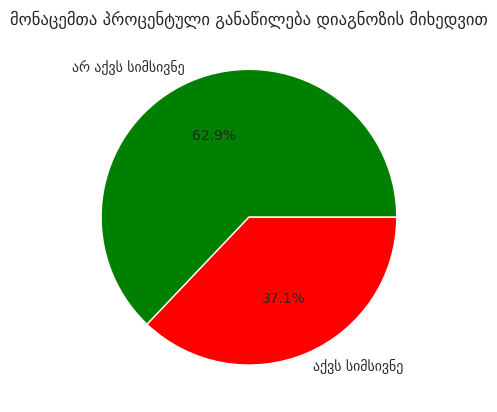

In [ ]:
class_balance = df['დიაგნოზი'].value_counts(normalize=True) * 100
class_balance = class_balance.round(1)
labels = ['არ აქვს სიმსივნე', 'აქვს სიმსივნე']
colors = ['green', 'red']
plt.pie(class_balance, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('მონაცემთა პროცენტული განაწილება დიაგნოზის მიხედვით')
plt.show()

თუმცა, ეს დისბალანსი არ არის ძალიან მკვეთრი ჩვენი ამოცანის და ზოგადად მანქანური სწავლების პროცესში გამოყენებული მონაცემების დასაშვებობის მიზნებისთვის. არ გვაქვს უკიდურესი დისბალანსი (მაგალითად, 90-10% ან 95-5%) და ორივე კლასს აქვს საკმარისი რაოდენობის შემთხვევები (500-ზე მეტი) მანქანური სწავლებისთვის. სხვაობა კლასებს შორის არ არის იმდენად დიდი, რომ მნიშვნელოვნად დააზიანოს მოდელის სწავლების პროცესი.

შესაბამისად, მონაცემთა რაოდენობრივი განაწილება ეტიკეტის მიხედვით ნორმალურია.

In [ ]:
print("მონაცემთა სტრუქტურა:\n")
df.info()

მონაცემთა სტრუქტურა:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ასაკი                   1500 non-null   int64  
 1   ბიოლოგიური გენდერი      1500 non-null   int64  
 2   BMI                     1500 non-null   float64
 3   მწეველი                 1500 non-null   int64  
 4   გენეტიკური რისკი        1500 non-null   int64  
 5   ფიზიკური აქტივობა       1500 non-null   float64
 6   ალკოჰოლის მიღების დონე  1500 non-null   float64
 7   სიმსივნის ისტორია       1500 non-null   int64  
 8   დიაგნოზი                1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


ვხედავთ, რომ თითოეულ სვეტში (როგორც დიაგნოზის, ასევე მახასიათებლების) მონაცემებში არ გვაქვს არცერთი გამოტოვებული მონაცემი. ამის გადამოწმება შეგვიძლია ასევე შემდეგნაირად:

In [ ]:
print("გამოტოვებული (ცარიელი) მონაცემების საერთო რაოდენობა თითოეული მახასიათებლის, მათ შორის, დიაგნოზის მიხედვით: \n")
df.isnull().sum()

გამოტოვებული (ცარიელი) მონაცემების საერთო რაოდენობა თითოეული მახასიათებლის, მათ შორის, დიაგნოზის მიხედვით: 



,0
ასაკი,0
ბიოლოგიური გენდერი,0
BMI,0
მწეველი,0
გენეტიკური რისკი,0
ფიზიკური აქტივობა,0
ალკოჰოლის მიღების დონე,0
სიმსივნის ისტორია,0
დიაგნოზი,0


In [ ]:
print("სტატისტიკური ინფორმაცია თითოეული მახასიათებლის შესახებ:\n")
df.describe()

სტატისტიკური ინფორმაცია თითოეული მახასიათებლის შესახებ:



,ასაკი,ბიოლოგიური გენდერი,BMI,მწეველი,გენეტიკური რისკი,ფიზიკური აქტივობა,ალკოჰოლის მიღების დონე,სიმსივნის ისტორია,დიაგნოზი
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


კიდევ ერთხელ ვხედავთ, რომ გამოტოვებული მონაცემები არ გვაქვს არცერთ სვეტში. მიუხედავად იმისა, რომ უწყვეტი მონაცემების მედიანასა და საშუალო არითმეტიკულის მნიშვნელობები ახლოსაა ერთმანეთთან, ვერ ვიტყვით, რომ მონაცემების ნორმალური განაწილება გვაქვს სახეზე. იხილეთ დეტალურად ქვემოთ, თითოეული მახასიათებლის მნიშვნელობებისთვის შექმნილ ჰისტოგრამებზე.

In [ ]:
print("უნიკალური მნიშვნელობების რაოდენობა თითოეულ სვეტში:\n")
df.nunique()

უნიკალური მნიშვნელობების რაოდენობა თითოეულ სვეტში:



,0
ასაკი,61
ბიოლოგიური გენდერი,2
BMI,1500
მწეველი,2
გენეტიკური რისკი,3
ფიზიკური აქტივობა,1500
ალკოჰოლის მიღების დონე,1500
სიმსივნის ისტორია,2
დიაგნოზი,2


აქვე განვმარტავთ თითოეული მახასიათებლის მონაცემი არის კატეგორიული თუ უწყვეტი:

1. **ასაკი** - უწყვეტი მონაცემი
   - ვინაიდან შეიძლება იყოს ნებისმიერი დადებითი რიცხვი

2. **ბიოლოგიური გენდერი** - კატეგორიული მონაცემი
   - ორი მნიშვნელობა (0=კაცი, 1=ქალი)

3. **BMI** - უწყვეტი მონაცემი
   - იზომება უწყვეტ სკალაზე და შეიძლება მიიღოს ნებისმიერი რიცხვითი მნიშვნელობა გარკვეულ დიაპაზონში

4. **მწეველი** - კატეგორიული მონაცემი
   - ორი დისკრეტული მნიშვნელობა (0=არამწეველი, 1=მწეველი)

5. **გენეტიკური რისკი** - კატეგორიული მონაცემი
   - სამი დისკრეტული მნიშვნელობა (0=დაბალი, 1=საშუალო, 2=მაღალი)

6. **ფიზიკური აქტივობა** - უწყვეტი მონაცემი
   - იზომება საათებში და შეიძლება მიიღოს ნებისმიერი დადებითი რიცხვითი მნიშვნელობა

7. **ალკოჰოლის მიღების დონე** - უწყვეტი მონაცემი
   - იზომება ერთეულებში და შეიძლება მიიღოს ნებისმიერი დადებითი რიცხვითი მნიშვნელობა

8. **სიმსივნის ისტორია** - კატეგორიული მონაცემი
   - ორი დისკრეტული მნიშვნელობა (0=არ აქვს, 1=აქვს)

9. **დიაგნოზი** - კატეგორიული მონაცემი
   - ორი დისკრეტული მნიშვნელობა (0=ნეგატიური, 1=პოზიტიური)

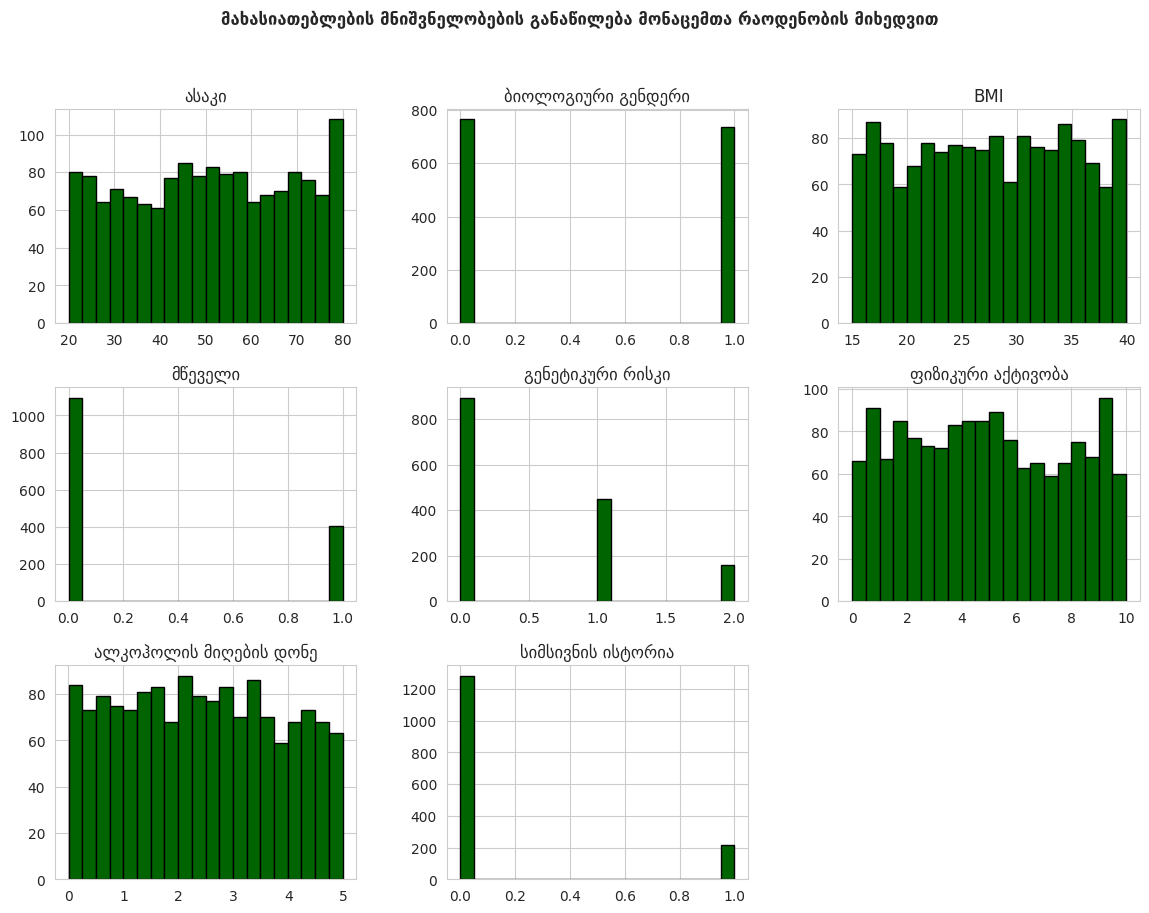

In [ ]:
# თითოეული მახასიათებლის მნიშვნელობების განაწილების ვიზუალიზაცია

df.drop('დიაგნოზი', axis=1).hist(bins=20, figsize=(14,10), color='darkgreen', edgecolor='black')
plt.suptitle("მახასიათებლების მნიშვნელობების განაწილება მონაცემთა რაოდენობის მიხედვით", fontsize=12, fontweight='bold')
plt.show()

მოცემული ვიზუალიზაცია გვიჩვენებს მონაცემების რაოდენობრივ განაწილებას თითოეული მახასიათებლის მნიშვნელობების მიხედვით. საერთო რაოდენობის მიხედვით მონაცემების უმრავლესობა არ არის საშუალო არითმეტიკულის გარშემო თავმოყრილი თუმცა იმასაც ვერ ვიტყვით, რომ საშუალო მნიშვნელობის გარშემო არ არის სიმეტრიული. განაწილება მართალია არ არის 100%-იანი სიზუსტით სიმეტრიული საშუალოს გარშემო, თუმცა არც ისეთი რადიკალური სხვაობა ჩანს. ეს საერთო სურათში ასე ჩანს. საერთო სურათში იგულისხმება მახასიათებლების მნიშვნელობების დაყოფა ორივე ეტიკეტის რაოდენობების ჯამით. თუმცა თუ ჩვენ თითოეული მახასიათებლის მნიშვნელობას თავის მხრივ ჩავშლით ეტიკეტის მიხედვით (ანუ, აქვს სიმსივნე და არ აქვს სიმსივნე) კატეგორიებად, დავინახავთ, რომ მონაცემთა განაწილება არ არის ნორმალურ. იხილეთ ქვემოთ მოცემული ჰისტოგრამები.

უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება დიაგნოზის/ეტიკეტის მიხედვით


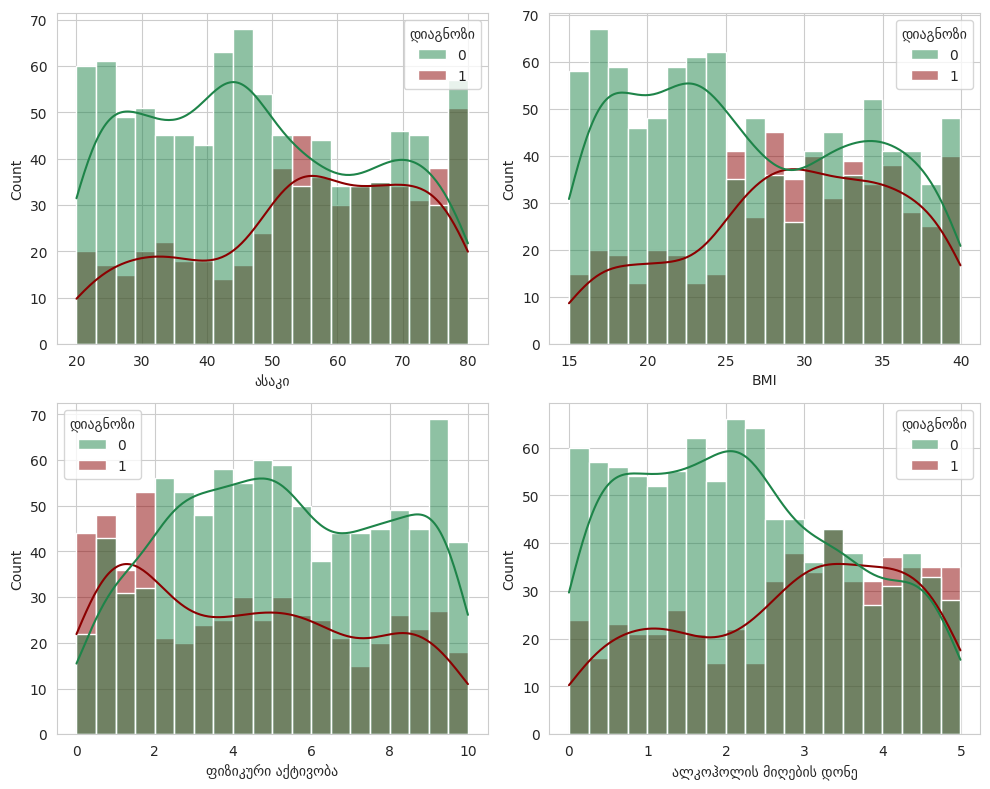

In [ ]:
# უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება დიაგნოზის მიხედვით
# ნომაცემთა ნორმალური განაწილების არსებობა-არარსებობის შემოწმებისთვის, ვიღებთ მხოლოდ უწყვეტ მონაცემებს.

print("უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება დიაგნოზის/ეტიკეტის მიხედვით")

fig, axes = plt.subplots(2,2, figsize=(10, 8))
custom_palette = sns.color_palette(["#1E8449", "#8B0000"])

sns.histplot(df, x="ასაკი", hue="დიაგნოზი", bins=20, kde=True, palette=custom_palette, ax=axes[0, 0])
sns.histplot(df, x="BMI", hue="დიაგნოზი", bins=20, kde=True, palette=custom_palette, ax=axes[0, 1])
sns.histplot(df, x="ფიზიკური აქტივობა", hue="დიაგნოზი", bins=20, kde=True, palette=custom_palette, ax=axes[1, 0])
sns.histplot(df, x="ალკოჰოლის მიღების დონე", hue="დიაგნოზი", bins=20, kde=True, palette=custom_palette, ax=axes[1, 1])

plt.tight_layout()
plt.show()

მოცემულ ჰისტოგრამებზე დაყრდნობით ვხედავთ, რომ მონაცემების ნორმალურ განაწილებასთან არ გვაქვს საქმე. როგორც სიმსივნის მქონე, ასევე სიმსივნის არმქონე პაციენტებში მონაცემთა ნორმალური განაწილება არ გვაქბს, თუმცა განაწილება არც იდენტურია. დიაგნოზის მიხედვით მონაცემების განაწილება არაერთგვაროვანია თითოეული მახასიათებლების მიხედვით. ამას ერთი მხრივ განაპირობებს ჯანმრთელი და სიმსივნის მქონე პაციენტების რაოდენობებს შორის არათანაბარი პროპორცია, ასევე მახასიათებლების დიაგნოზთან დაბალი კორელაცია. თუმცა ზემოთ მოცემულ ჰისტოგრამებზე დაყრდნობით შეგვიძლია გარკვეული ლოგიკური დასკვნების გაკეთება. მაგალითად, ალკოჰოლის მიღების დონე სიმსივნის მქონე პაციენტებში რაც უფრო მაღალი მაჩვენებელი აქვს, ამგვარი პაციენტების რაოდენობაც ზრდადია. ხოლო ჯანმრთელებში პირიქით, როცა ალკოჰოლის მიღების დონე დაბალია ჯანმრთელი პაციენტების რაოდენობა მაღალია და ალკოჰოლის მიღების დონის ზრდასთან ერთად ეს რაოდენობა მცირდება. იგივე ლოგიკა ვრცელდება ფიზიკურ აქტივობაზეც და BMI-ის მაჩვენებელზე.

მოცემულ შემთხვევაში მონაცემთა ნორმალური განაწილება არცერთ მახასიათებელში არ გვაქვს როცა ჩავშალეთ მონაცემები დიაგნოზის კლასების/ეტიკეტის მიხედვით. მონაცემთა ნორმალური განაწილება გვაქვს მაშინ, როდესაც მონაცემების უმრავლესობა საშუალო მნიშვნელობის გარშემო არის თავმოყრილი და განაწილება სიმეტრიულია. ეს ნიშნავს, რომ მონაცემთა განაწილების გრაფიკი "ზარის" ფორმას მიიღებს, რაც ამ შემთხვევაში არ გვაქვს.

აქვე განვმარტავთ, რომ ნორმალური განაწილება მხოლოდ უწყვეტ მონაცემებზე შემოწმდება, რადგან ის გულისხმობს, რომ მონაცემები უწყვეტად არის განაწილებული გრაფიკზე, სადაც საშუალო მნიშვნელობის გარშემო სიმეტრიული განაწილებაა შესაძლებელი.

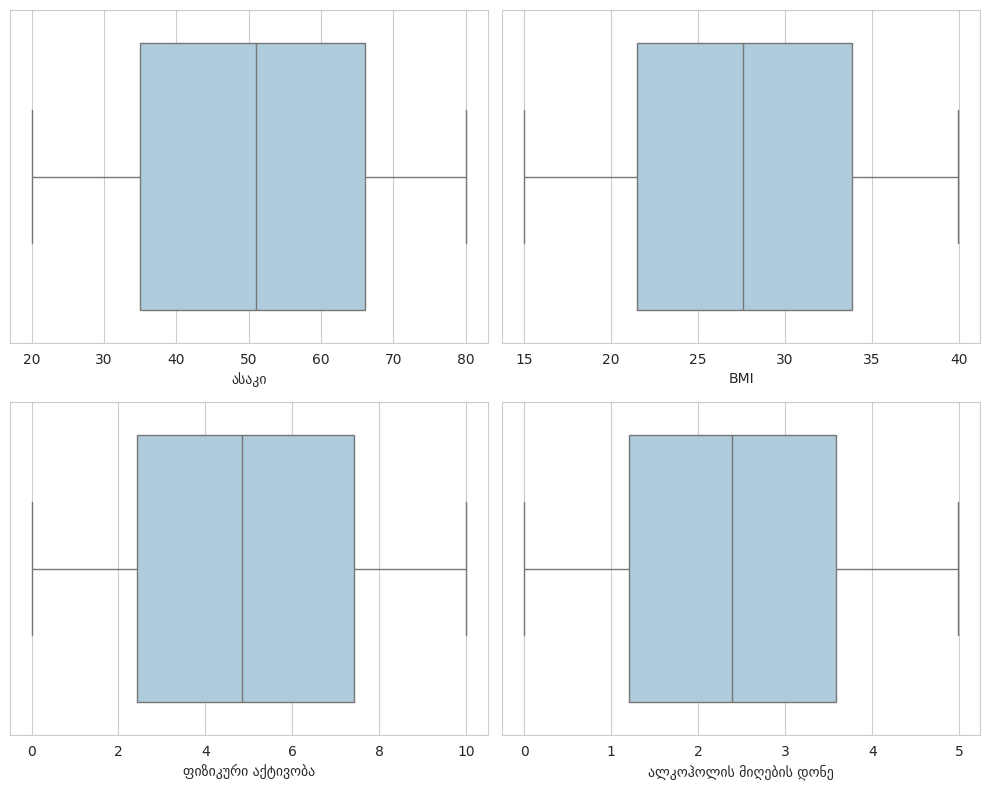

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(df, x="ასაკი", ax=axes[0, 0])
sns.boxplot(df, x="BMI", ax=axes[0, 1])
sns.boxplot(df, x="ფიზიკური აქტივობა", ax=axes[1, 0])
sns.boxplot(df, x="ალკოჰოლის მიღების დონე", ax=axes[1, 1])

plt.tight_layout()
plt.show()

მახასიათებლების მონაცემების ჰისტოგრამებს რომ დავაკვირდეთ მონაცემები არ არის რომელიმე მხარეს წანაცვლებული შესამჩნევად და კუდიც არ აქვს, ეს გვიჩვენებს რომ მონაცემებში აუთლაიერები არ გვაქვს, რომლებიც გავლენას მოახდენს საერთო მონაცემების განაწილებაზე. თითოეული მახასიათებლის ბოქსპლოტზე ამას უფრო კარგად ვხედავთ.

**უწყვეტი მონაცემების დეტალური ანალიზი კატეგორიული მახასიათებლების ჭრილში**

ბიოლოგიური გენდერის მიხედვით

უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება ბიოლოგიური გენდერის მიხედვით


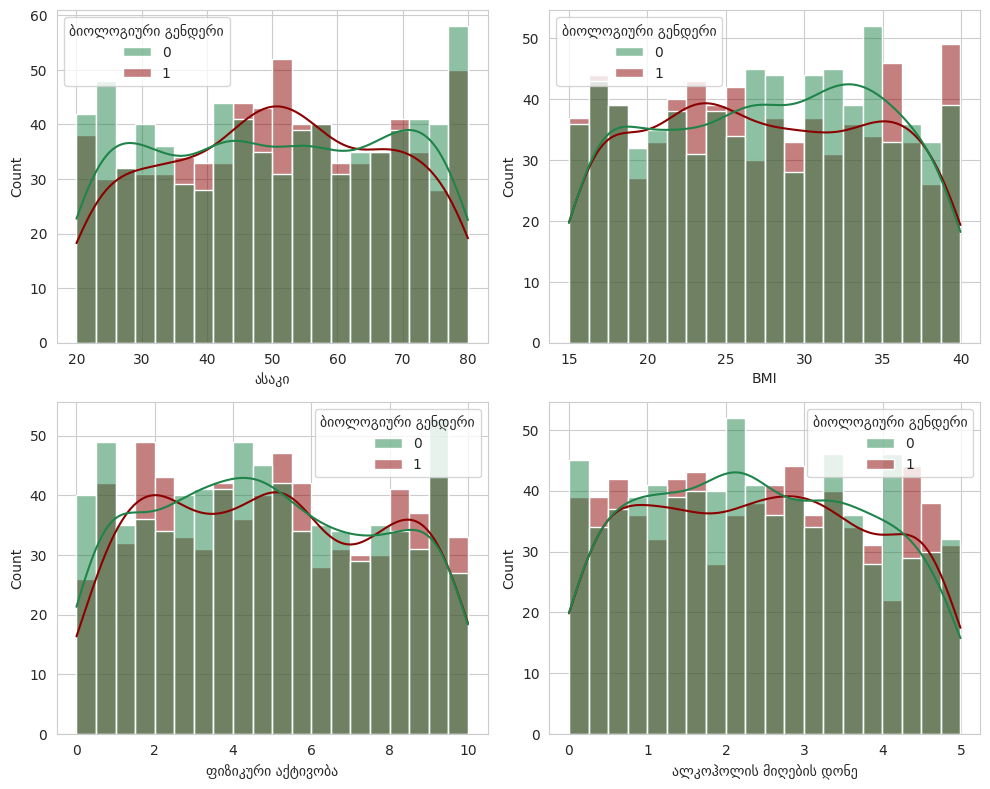

In [ ]:
# უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება გენდერის (0-მამრობითი, 1-მდედრობითი) მიხედვით

print("უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება ბიოლოგიური გენდერის მიხედვით")

fig, axes = plt.subplots(2,2, figsize=(10, 8))
custom_palette = sns.color_palette(["#1E8449", "#8B0000"])

sns.histplot(df, x="ასაკი", hue="ბიოლოგიური გენდერი", bins=20, kde=True, palette=custom_palette, ax=axes[0, 0])
sns.histplot(df, x="BMI", hue="ბიოლოგიური გენდერი", bins=20, kde=True, palette=custom_palette, ax=axes[0, 1])
sns.histplot(df, x="ფიზიკური აქტივობა", hue="ბიოლოგიური გენდერი", bins=20, kde=True, palette=custom_palette, ax=axes[1, 0])
sns.histplot(df, x="ალკოჰოლის მიღების დონე", hue="ბიოლოგიური გენდერი", bins=20, kde=True, palette=custom_palette, ax=axes[1, 1])

plt.tight_layout()
plt.show()

მწეველის სტატუსის მიხედვით

უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება მწეველი არის თუ არა - მიხედვით


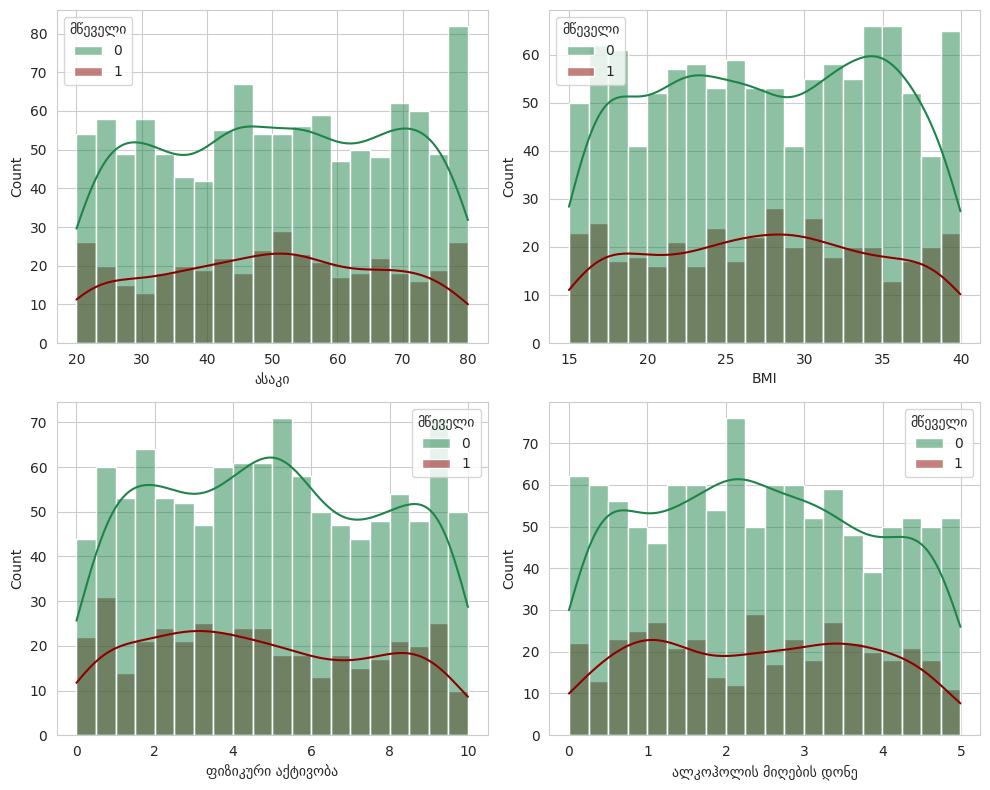

In [ ]:
# უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება მწეველიის მიხედვით (0-არამწეველი, 1-მწეველი) მიხედვით

print("უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება მწეველი არის თუ არა - მიხედვით")

fig, axes = plt.subplots(2,2, figsize=(10, 8))
custom_palette = sns.color_palette(["#1E8449", "#8B0000"])

sns.histplot(df, x="ასაკი", hue="მწეველი", bins=20, kde=True, palette=custom_palette, ax=axes[0, 0])
sns.histplot(df, x="BMI", hue="მწეველი", bins=20, kde=True, palette=custom_palette, ax=axes[0, 1])
sns.histplot(df, x="ფიზიკური აქტივობა", hue="მწეველი", bins=20, kde=True, palette=custom_palette, ax=axes[1, 0])
sns.histplot(df, x="ალკოჰოლის მიღების დონე", hue="მწეველი", bins=20, kde=True, palette=custom_palette, ax=axes[1, 1])

plt.tight_layout()
plt.show()

გენეტიკური რისკის მიხედვით

უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება გენეტიკური რისკის მიხედვით


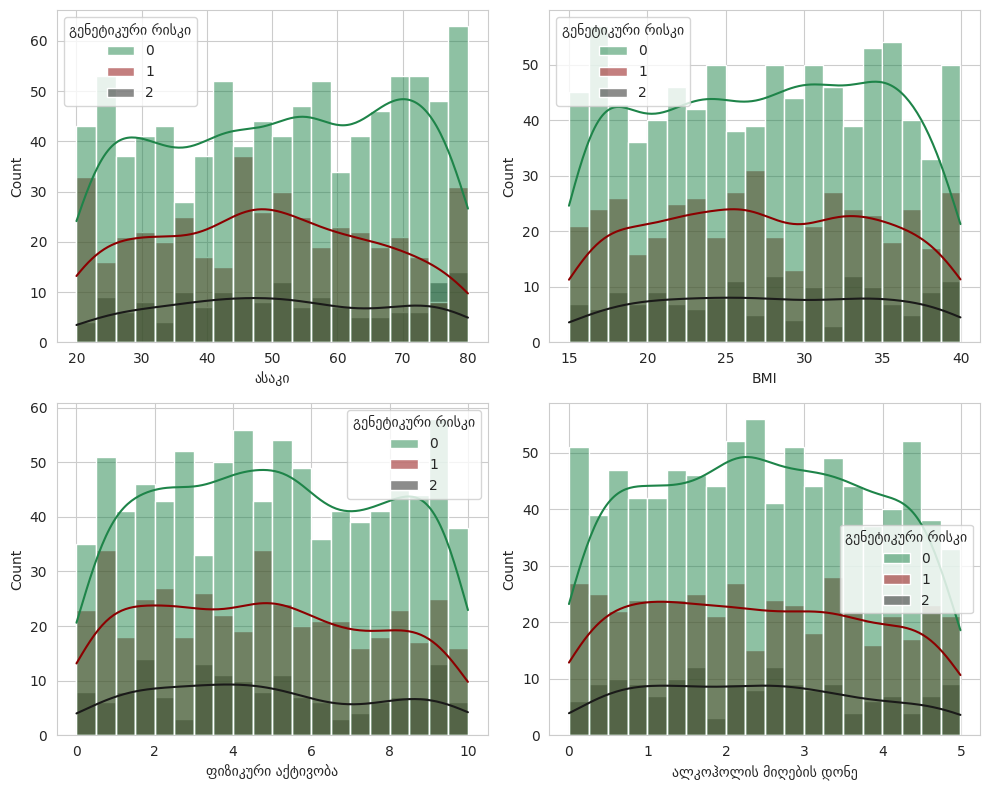

In [ ]:
# უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება გენეტიკური რისკის  (0-დაბალი, 1-საშუალო, 2- მაღალი) მიხედვით

print("უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება გენეტიკური რისკის მიხედვით")

fig, axes = plt.subplots(2,2, figsize=(10, 8))
custom_palette = sns.color_palette(["#1E8449", "#8B0000", "#1A1A19"])

sns.histplot(df, x="ასაკი", hue="გენეტიკური რისკი", bins=20, kde=True, palette=custom_palette, ax=axes[0, 0])
sns.histplot(df, x="BMI", hue="გენეტიკური რისკი", bins=20, kde=True, palette=custom_palette, ax=axes[0, 1])
sns.histplot(df, x="ფიზიკური აქტივობა", hue="გენეტიკური რისკი", bins=20, kde=True, palette=custom_palette, ax=axes[1, 0])
sns.histplot(df, x="ალკოჰოლის მიღების დონე", hue="გენეტიკური რისკი", bins=20, kde=True, palette=custom_palette, ax=axes[1, 1])

plt.tight_layout()
plt.show()

სიმსივნის ისტორიის მიხედვით

უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება სიმსივნის ისტორიის მიხედვით


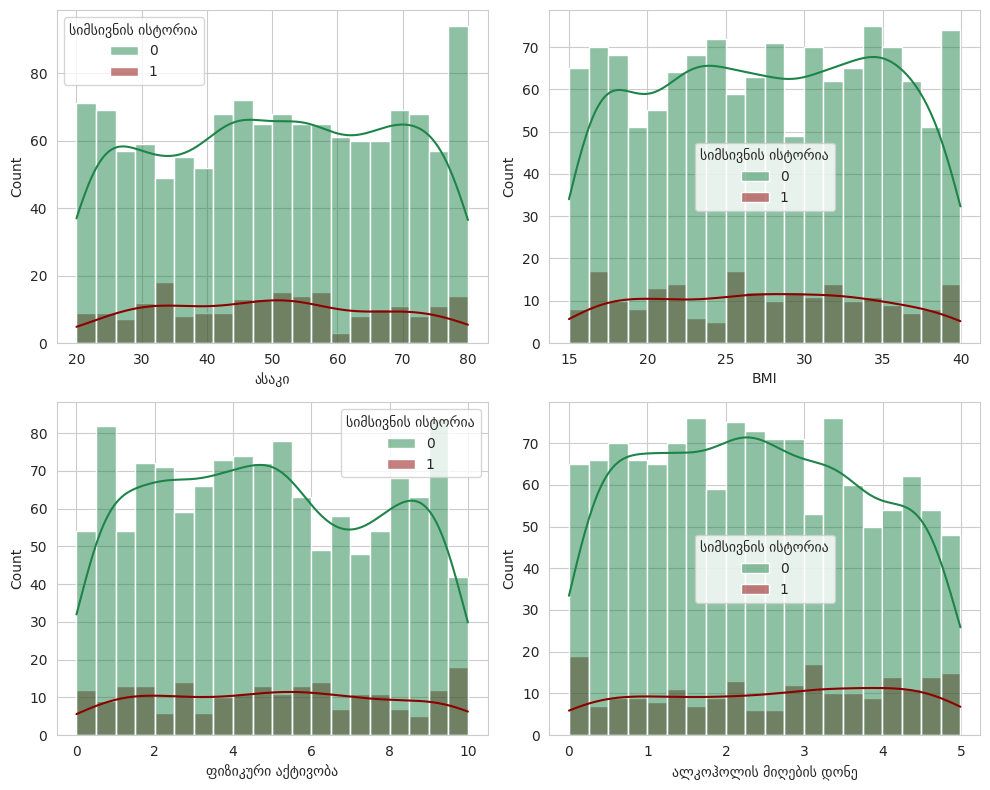

In [ ]:
# უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება სიმსივნის ისტორიის (0-არ აქვს, 1- აქვს) მიხედვით

print("უწყვეტ მონაცემთა მნიშვნელობების რაოდენობრივი განაწილება სიმსივნის ისტორიის მიხედვით")

fig, axes = plt.subplots(2,2, figsize=(10, 8))
custom_palette = sns.color_palette(["#1E8449", "#8B0000"])

sns.histplot(df, x="ასაკი", hue="სიმსივნის ისტორია", bins=20, kde=True, palette=custom_palette, ax=axes[0, 0])
sns.histplot(df, x="BMI", hue="სიმსივნის ისტორია", bins=20, kde=True, palette=custom_palette, ax=axes[0, 1])
sns.histplot(df, x="ფიზიკური აქტივობა", hue="სიმსივნის ისტორია", bins=20, kde=True, palette=custom_palette, ax=axes[1, 0])
sns.histplot(df, x="ალკოჰოლის მიღების დონე", hue="სიმსივნის ისტორია", bins=20, kde=True, palette=custom_palette, ax=axes[1, 1])

plt.tight_layout()
plt.show()

**მახასიათებლებს შორის კორელაციური დამოკიდებულება**

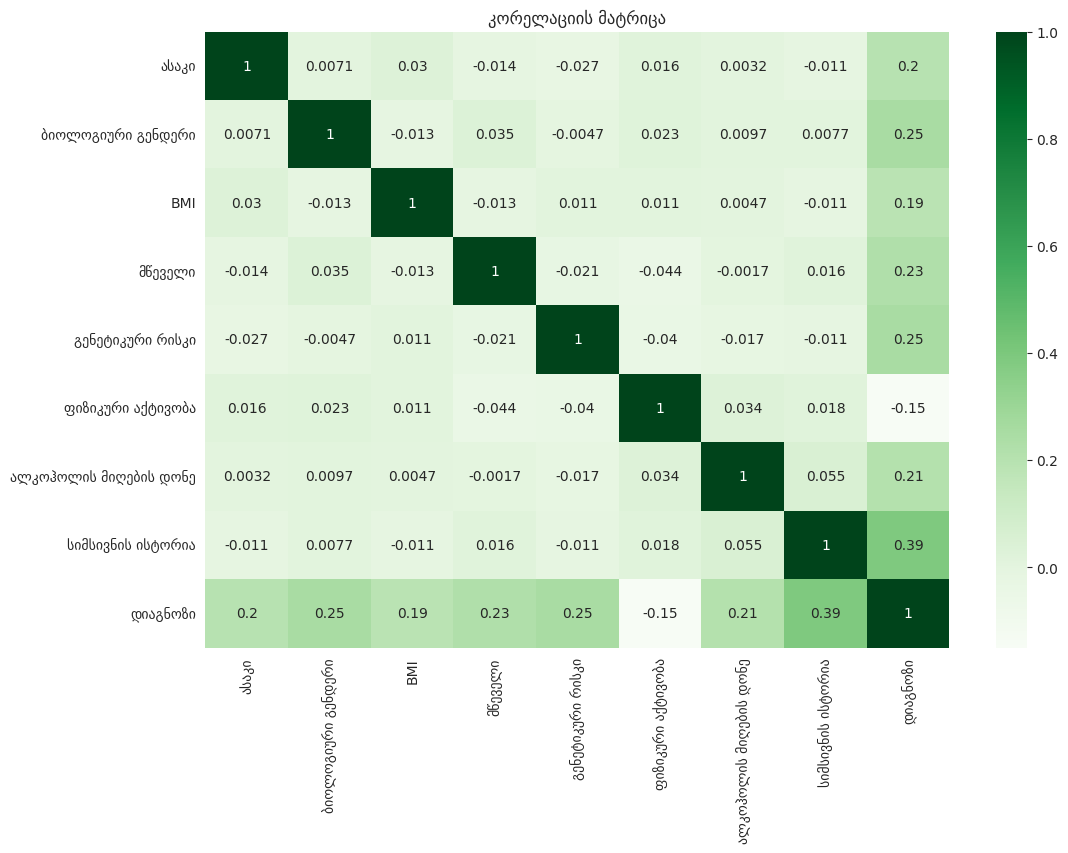

In [ ]:
# კორელაციის მატრიცა - გვიჩვენებს ურთიერთდამოკიდებულებას (კორელაციას) მონაცემთა ნაკრების სხვადასხვა მახასიათებლებს (ცვლადებს) შორის. იმისათვის, რომ გავიგოთ, თუ როგორ არიან დაკავშირებული სხვადასხვა მახასიათებლები ერთმანეთთან.
# კოეფიციენტები (-1-დან +1-მდე), სადაც +1 ნიშნავს სრულ დადებით კორელაციას, -1 ნიშნავს სრულ უარყოფით კორელაციას და 0 ნიშნავს კორელაციის არარსებობას

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title('კორელაციის მატრიცა')
plt.show()

როგორც კორელაციის მატრიცაში ვხედავთ, მახასიათებლებს შორის კორელაციის მაჩვენებელი ყველა შემთხვევაში 0.5-ზე ნაკლებია და უმეტესად 0-ზე ნაკლებია. ეს კი ნიშნავს:

> **მახასიათებლებს შორის მნიშვნელოვანი კავშირი არ არის** - მახასიათებლებს, რომელთა შორისაც კორელაცია ძალიან დაბალია (0-ზე მეტი, თუმცა 0.5-ზე ნაკლები), ერთმანეთთან მნიშვნელოვანი კავშირი არ აქვთ, რაც იმას ნიშნავს, რომ ერთი მახასიათებლის ცვლილებისას, დიდი ალბათობით, არ იცვლება სხვა მახასიათებელი.  დაბალი კორელაცია ერთი მხრივ სასარგებლოცაა, განსაკუთრებით როცა გვსურს თავიდან ავიცილოთ ზედმეტად მსგავსი მახასიათებლები.

> **ზოგიერთ შემთხვევაში გვაქვს უარყოფითი კორელაციაც მახასიათებლებს შორის** - თუ კორელაციის მაჩვენებლები უმეტესად 0-ზე ნაკლებია, მახასიათებლებს შორის არის სუსტი ან უარყოფითი კავშირი. ეს კი ნიშნავს, რომ ერთი მახასიათებლის ზრდისას სავარაუდოდ, არ ხდება მეორე მახასიათებლის კლება.

> **მოცემულ შემთხვევაში გვაქვს დიაგნოზის მიმართ მახასიათებლების დამოუკიდებლობა** - ასეთი შედეგი მიუთითებს, რომ მახასიათებლები შედარებით დამოუკიდებლად ფუნქციონირებენ.

საერთო ჯამში, ასეთი მატრიცა დადებითი შეიძლება იყოს მოდელისთვის, რადგან მახასიათებლების მრავალფეროვანი ნაკრები გვაქვს, რომლებიც მოდელს სხვადასხვა კუთხით ახასიათებენ, ზედმეტი ან გამეორებადი ინფორმაციის გარეშე. ასევე გამოიკვეთა რომ არ გვაქვს საქმე მულტიკოლენიარობასთან.

მონაცემების გამოსახვა ორ განზომილებიან გრაფიკზე განზომილების შემცირების ტექნიკის საშუალებით.

In [ ]:
# მონაცემების სტანდარტიზაცია

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('დიაგნოზი', axis=1))

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df.drop(['ბიოლოგიური გენდერი', 'მწეველი', 'გენეტიკური რისკი', 'სიმსივნის ისტორია', 'დიაგნოზი'], axis=1))

In [ ]:
# მონაცემთა განზომილების შემცირება PCA ტექნიკის გამოყენებით

pca = PCA(n_components=2, random_state=SEED_VALUE)
pca_data = pca.fit_transform(scaled_data)

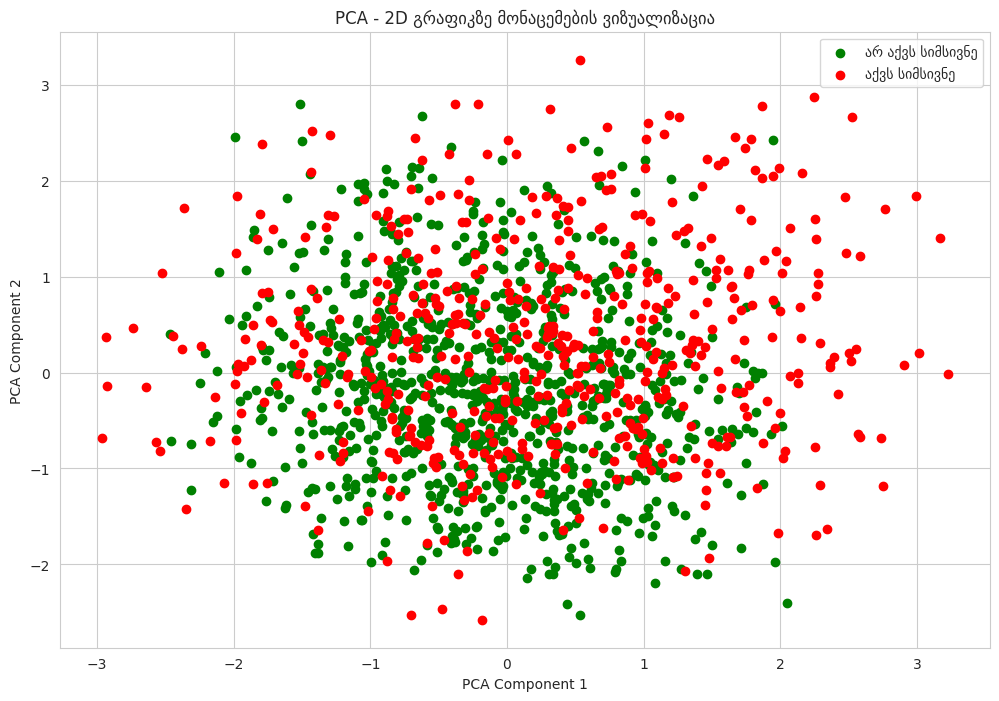

In [ ]:
# მონაცემების ვიზუალიზაცია 2D გრაფიკზე label (კლასის) მიხედვით

plt.figure(figsize=(12, 8))
plt.scatter(pca_data[df['დიაგნოზი'] == 0][:, 0], pca_data[df['დიაგნოზი'] == 0][:, 1],
            color='green', label='არ აქვს სიმსივნე')
plt.scatter(pca_data[df['დიაგნოზი'] == 1][:, 0], pca_data[df['დიაგნოზი'] == 1][:, 1],
            color='red', label='აქვს სიმსივნე')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - 2D გრაფიკზე მონაცემების ვიზუალიზაცია')
plt.legend()
plt.show()

მოცემულ შემთხვევაში PCA-ის გამოყენებას ვერ მივიჩნევთ წარმატებულად, რადგან ერთი მხრივ, მონაცემებს არ აქვს ძალიან ბევრი მახასიათებელი (სულ 8 გვაქვს) და თანაც მახასიათებლებს შორის კორელაციაც არ არის მაღალი. მეტი სიზუსტისთვის, როცა მახასიათებლებს შორის მაღალი კორელაცია არსებობს, PCA ამ კორელაციებს იყენებს, რათა ამოარჩიოს კომპონენტები, რომლებიც მაქსიმალურად აღწერენ მონაცემთა ვარიაციას. შედეგად, შესაძლებელი ხდება, ორიგინალური მახასიათებლების ნაკლები რაოდენობის კომპონენტებით ეფექტურად ჩანაცვლება.

მონაცემების ორ კომპონენტიან განზომილებაში გამოსახვა ვიზუალურად გვიჩვენებს მონაცემთა სტრუქტურას, კლასტერებს და ტენდენციებს, რათა ვიზუალურად დავინახოთ კლასტერები ან განსხვავებული ჯგუფები. მოცემულ შემთხვევაში ზემოთ მოცემულ ვიზუალიზაციაში მსგავსი კლასტერების გამოყოფა შეუძლებელია, რადგან მსგავსი ტენდენცია არ შეინიშნება, ეს კი პირველ რიგში გამოწვეულია მახასიათებლებს შორის კორელაციის დაბალი მაჩვნებლით.

იმის გათვალისწინებით, რომ ჩვენს ამოცანაში მონაცემები არაწრფივია, მასთან PCA-ის ნაცვლად, ეფექტური შეიძლება იყოს UMAP-ის, მონაცემთა განზომილების შემცირების მეორე ტექნიკის გამოყენება.

**UMAP (Uniform Manifold Approximation and Projection)** - მონაცემთა განზომილების შემცირების ერთ-ერთი ტექნიკაა, რომელიც გამოყოფს მონაცემების **სტრუქტურულ ურთიერთობებს** და ინარჩუნებს მას, განსაკუთრებით მრავალგანზომილებიან მონაცემებში. ის გამოიყენება ისეთი ამოცანებისთვის, როგორიცაა მონაცემთა **ვიზუალიზაცია, კლასტერების გამოვლენა** და მაღალი განზომილებიანი მონაცემების სწრაფი ანალიზი.

UMAP-ის ტექნიკა ქმნის მონაცემების არაწრფივ სტრუქტურას, ამოიცნობს მახლობელ წერტილებს და ინარჩუნებს ამ ურთიერთობებს შემცირებულ განზომილებაში. ეს ტექნიკა განსაკუთრებით ეფექტურია კომპლექსურ და არაწრფივ მონაცემებთან მუშაობისას. სწორედ ამიტომ, მოცემული ტექნიკის გამოყენება რელევანტურად მიგვაჩნია ჩვენს ამოცანაშიც.

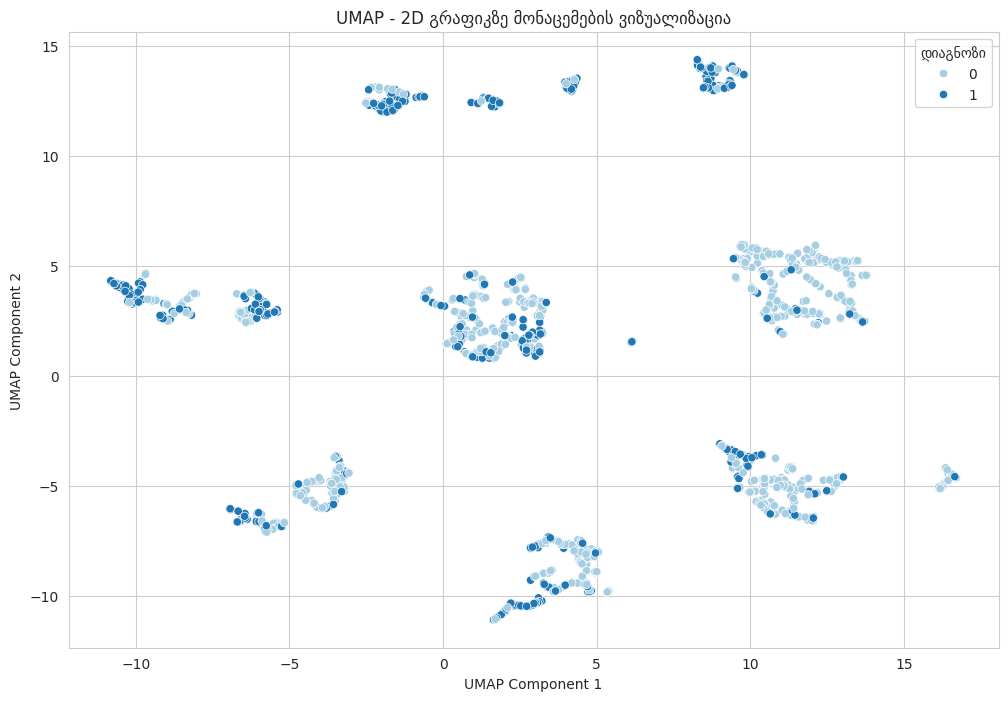

In [ ]:
# მონაცემთა განზომილების შემცირება UMAP ტექნიკის გამოყენებით

umap_model = umap.UMAP(n_components=2, n_neighbors=5, n_jobs=1, random_state=SEED_VALUE)
umap_projection = umap_model.fit_transform(scaled_data)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_projection[:, 0], y=umap_projection[:, 1], hue=df['დიაგნოზი'])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP - 2D გრაფიკზე მონაცემების ვიზუალიზაცია')
plt.show()

UMAP ტექნიკის გამოყენების შედეგად ვხედავთ მონაცემთა განზომილების შემცირებით (2 კომპონენტამდე დაყვანით) გარკვეულ კლასტერებს და მონაცემთა გარკვეული ლოგიკით დაჯგუფების ტენდენციას.

UMAP ტექნიკის გამოყენების შედეგად მონაცემების კლასტერებად დაყოფა და მათი ოთხივე საკორდინატო სიბრტყის ერთეულში განლაგება ნიშნავს, რომ მონაცემთა განზომილებები (შემცირებული ორ კომპონენტამდე) წარმატებით ინარჩუნებს მახასიათებლებს შორის თავდაპირველ კავშირებს.

> **კლასტერების მკაფიო გამოყოფა** - UMAP-ის გამოყენებით, მონაცემთა სხვადასხვა ჯგუფი მკაფიო საზღვრებით გაიყო, მონაცემები ოთხივე ერთეულში განლაგებულია, რაც იმაზე მიუთითებს, რომ UMAP-ის ტექნიკამ ზუსტად გამოყო და ასახა მონაცემთა სუბსტრუქტურები, რაც აჩვენებს, რომ კლასტერების საზღვრები ერთმანეთისგან გარკვევით არის გამიჯნული. ანუ, თითოეული ჯგუფს აქვს ცალკეული სუბსტრუქტურა, რომელიც ნაკლებად ერევა დანარჩენებთან.
   
> **დაბალანსებული განაწილება**: მონაცემების ოთხივე ერთეულში განაწილება ნიშნავს, რომ UMAP-მა შეძლო განზომილების ეფექტურად შემცირება და მონაცემების სხვადასხვა ტიპის სტრუქტურების დამუშავება ისე, რომ არცერთი ჯგუფი არ არის "გაჭიმული" მხოლოდ ერთ ნაწილში, რაც შეიძლება აღნიშნავდეს ადრეული მონაცემების არასწორ განაწილებას.

> UMAP-ი ეფექტურად ინარჩუნებს მახლობელი მონაცემების ურთიერთობებს, ხოლო შორეული მონაცემები ნაკლებად ერევა ერთმანეთში. მონაცემების ამგვარი მკაფიო განლაგებაც სწორედ UMAP ტექნიკის წარმატებულ გამოყენებაზე მიუთითებს.

**დავალება 3**: გაამზადეთ მონაცემები სატრენინგოდ

In [ ]:
X = df.drop('დიაგნოზი', axis=1)
y = df['დიაგნოზი']

In [ ]:
# მონაცემების დაყოფა სატრენინგო და სატესტო მონაცემებად

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED_VALUE)

In [ ]:
print("სატრენინგო მონაცემების ზომა:", X_train.shape, y_train.shape)
print("სატესტო მონაცემების ზომა:", X_test.shape, y_test.shape)

სატრენინგო მონაცემების ზომა: (1200, 8) (1200,)
სატესტო მონაცემების ზომა: (300, 8) (300,)


In [ ]:
# მონაცემების სტანდარტიზაცია

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**დავალება 4**: მოცემული ალგორითმებისთვის განახორციელეთ ჰიპერპარამეტრების ოპტიმიზაცია:
1. Logistic Regression
2. Decision Tree
3. Random Forest

მოცემული ალგორითმისთვის ჰიპერპარამეტრების ოპტიმიზაცია გულისხმობს თითოეული ალგორითმის შესაბამისი ჰიპერპარამეტრების დიაპაზონების განსაზღვრას და მათი საუკეთესო კომბინაციების გამოვლენას მოდელის შედეგების გასაუმჯობესებლად. კერძოდ,
თითოეული ალგორითმისთვის უნდა შევარჩიოთ კონკრეტული ჰიპერპარამეტრები და მათი შესაძლო მნიშვნელობები, რომელთა გამოცდაც გვინდა და მათგან საუკეთესოს გამოვლენა.

In [ ]:
# 1. Logistic Regression-ისთვის ჰიპერპარამეტრების ოპტიმიზაცია
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 200, 300]
}

log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
# Grid Search არის მეთოდი, რომლითაც ვამოწმებთ სხვადასხვა ჰიპერპარამეტრებს კომბინაციებში. მისი მიზანია იპოვოს ისეთი კომბინაცია, რომელიც მიგვიყვანს საუკეთესო შედეგამდე.
# cv=5 ნიშნავს კროს-ვალიდაციის რაოდენობას. კერძოდ, მონაცემები გაყოფილი იქნება 5 ფოლდში, და ყოველი ფოლდი გამოყენებული იქნება როგორც სატესტო მონაცემი, ხოლო დანარჩენი როგორც სატრენინგო.


log_reg_grid.fit(X_train_scaled, y_train) # მოდელის ტრენინგი და საუკეთესო ჰიპერპარამეტრების გამოვლენა
print(f"Logistic Regression-ის საუკეთესო პარამეტრები: {log_reg_grid.best_params_}")


Logistic Regression-ის საუკეთესო პარამეტრები: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


liblinear - მცირე ზომის მონაცემთა ნაკრებისთვის შესაფერისი ალგორითმია.

In [ ]:
# 2. Decision Tree-ისთის ჰიპერპარამეტრების ოპტიმიზაცია
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train_scaled, y_train) # მოდელის ტრენინგი და საუკეთესო ჰიპერპარამეტრების გამოვლენა
print(f"Decision Tree-ის საუკეთესო პარამეტრები: {dt_grid.best_params_}")

Decision Tree-ის საუკეთესო პარამეტრები: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


Gini არის კრიტერიუმი, რომელიც გამოიყენება Decision Tree-ში - კლასიფიკაციის პრობლემებში, რათა განსაზღვროს, თუ როგორ უნდა განახორციელოს გაყოფა თითოეულ ახალ ნიშანზე.

In [ ]:
# 3. Random Forest-ისთვის ჰიპერპარამეტრების ოპტიმიზაცია
rf_params = {
    'n_estimators': [50, 100, 200],    # გადაწყვეტილების ხეების რაოდენობა
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]  # მონაცემთა ნაკრების შერჩევისთვის გამოიყენება. კერძოდ, განსაზღვრავს, თუ როგორ უნდა შეირჩეს მონაცემები თითოეული ხისთვის.
                                # True - გამოიყენება "bootstrap sampling" ანუ მონაცემები შემთხვევით შერჩეულია დუბლირების საშუალებით (sampling with replacement).
                                # False - არ გამოიყენება დუბლირება, ამიტომ თითოეული ხე მიიღებს უნიკალურ მონაცემებს.
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train) # მოდელის ტრენინგი და საუკეთესო ჰიპერპარამეტრების გამოვლენა
print(f"Random Forest-ის საუკეთესო პარამეტრები: {rf_grid.best_params_}")

Random Forest-ის საუკეთესო პარამეტრები: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Random Forest-ის ალგორითმი აერთიანებს  მრავალ გადაწყვეტილების ხეს, რაც აუმჯობესებს პროგნოზის სიზუსტეს. კერძოდ, გვეხმარება მარტივად გავიგოთ თუ რომელი ფაქტორები ახდენენ ყველაზე დიდ გავლენას სიმსივნის დაავადების პროგნოზირებაზე.

**დავალება 5**: საბოლოოდ, ამოარჩიეთ საუკეთესო ალგორითმი ოპტიმალური პარამეტრებით.

თითოეულ ზემოთ მოცემულ ალგორითმზე მოდელის ტრენინგისა და საუკეთესო ჰიპერპარამეტრების გამოვლენის შემდგომ, საუკეთესო ალგორითმის შესარჩევად საჭიროა  თითოეული მოდელის შეფასება - შეფასების მეტრიკებზე დაყრდნობით და მათი შედარების შედეგად საუკეთესო ალგორითმის შერჩევა.

შეფასება შემდეგი შეფასების მეტრიკების საფუძველზე:

> **Precision** - გვიჩვენებს რამდენად ზუსტად აიდენტიფიცირებს მოდელი პოზიტიურ (1) ეტიკეტს, ანუ რამდენი ნამდვილი დადებითი კლასია ყველა პოზიტიური პროგნოზიდან. იგი მნიშვნელოვანია მაშინ, როდესაც არასწორი დადებითი შედეგები (False Positives) პრობლემურია. ჩვენს ამოცანაში ეს რელევანტურია, რადგან თუ სიმსივნის მოდელს დავალებული აქვს მხოლოდ ის პაციენტები გამოყოს, რომლებსაც ნამდვილად აქვთ სიმსივნე, მაშინ Precision მაღალი უნდა იყოს, რათა პაციენტებს არ მისცეს ცრუ პოზიტიური პასუხი (არ ჰქონდეთ სიმსივნე, მაგრამ მიუთითოს, რომ აქვთ). რამდენად ზუსტია პოზიტიური პროგნოზები.

> **Recall** - თუ სიმსივნის დიაგნოზის მოდელში Recall დაბალია, ეს ნიშნავს, რომ მოდელი ხშირად გამოტოვებს სიმსივნის მქონე პაციენტებს. ამიტომ მნიშვნელოვანია, რომ საუკეთესო შერჩეულ მოდელს Recall მაჩვენებელი მაღალი ჰქონდეს - არასწორი უარყოფითი პროგნოზების შემცირების მიზნით. რამდენად კარგად გამოავლენს მოდელი ყველა ნამდვილ პოზიტიურ შემთხვევას.

> **F1-Score** - გვჭირდება როცა ბალანსი გვჭირდება Precision-სა და Recall-ს შორის. სიმსივნის დიაგნოზის შემთხვევაში, სადაც თანაბრად მნიშვნელოვანია, რომ არ არსებობდეს ნამდვილი სიმსივნის შემთხვევების გამოტოვება და ასევე არ ჩანდეს ცრუ დადებითი შემთხვევები.

> **AUC (Area Under Curve)** - გვიჩვენებს რამდენად კარგად განასხვავებს მოდელი დადებით და უარყოფით კლასებს. AUC მნიშვნელობები 0-დან 1-მდეა და რაც უფრო მაღალია AUC (1-ის ახლოს), მით უკეთესად განასხვავებს მოდელი დადებით და უარყოფით კლასებს.

ზემოთ მოცემული შეფასების მეტრიკებით მოდელების შეფასება სატესტო და სატრენინგო მონაცემებზე (თითოეული ალგორითმის პროგნოზი, ოპტიმალური ჰიპერპარამეტრებით, სატრენინგო და სატესტო მონაცემებზე).

**შეფასების მეტრიკების შედეგები Logistic Regression-ის გამოყენებისას - სატრენინგო და სატესტო მონაცემებზე**

In [ ]:
# შეფასების მეტრიკების შედეგები Logistic Regression-ის გამოყენებისას - სატრენინგო და სატესტო მონაცემებზე

def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]  # მხოლოდ AUC-სთვის

    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_proba)

    print("========================================================================")
    print(f"{dataset_name} მონაცემებზე შეფასების შედეგები:")
    print("========================================================================")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("========================================================================")

# სატრენინგო მონაცემებზე შეფასება
evaluate_model(log_reg_grid.best_estimator_, X_train_scaled, y_train, "სატრენინგო")

# სატესტო მონაცემებზე შეფასება
evaluate_model(log_reg_grid.best_estimator_, X_test_scaled, y_test, "სატესტო")



სატრენინგო მონაცემებზე შეფასების შედეგები:
Precision: 0.8266
Recall: 0.7598
F1 Score: 0.7918
AUC: 0.9139
სატესტო მონაცემებზე შეფასების შედეგები:
Precision: 0.8438
Recall: 0.8182
F1 Score: 0.8308
AUC: 0.9427


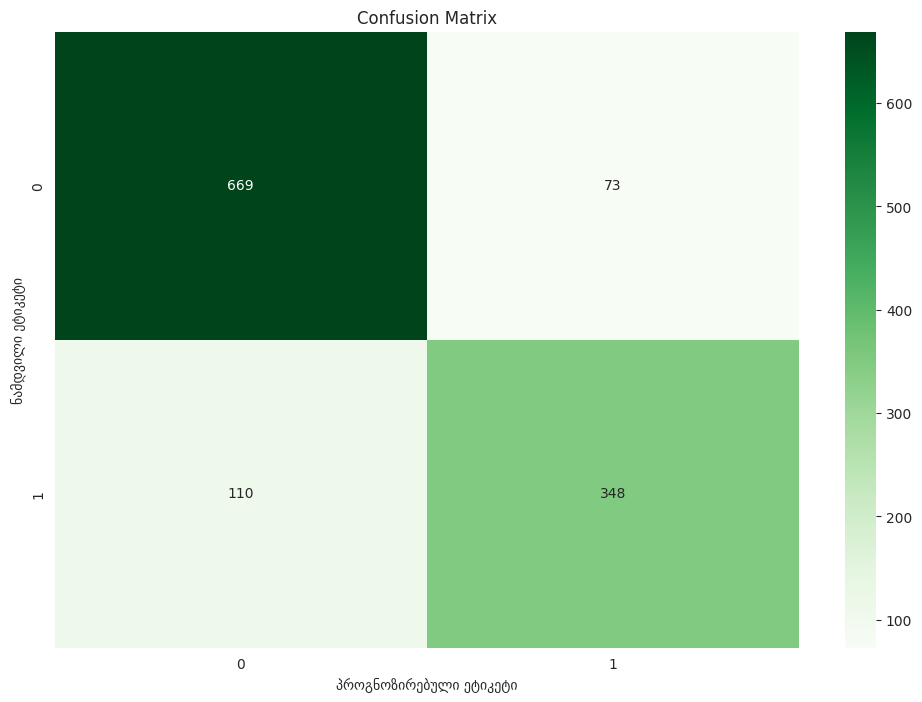

In [ ]:
# სატრენინგო მონაცემების დაბნეულობის მატრიცა

y_train_pred = log_reg_grid.predict(X_train_scaled)
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('პროგნოზირებული ეტიკეტი')
plt.ylabel('ნამდვილი ეტიკეტი')
plt.show()

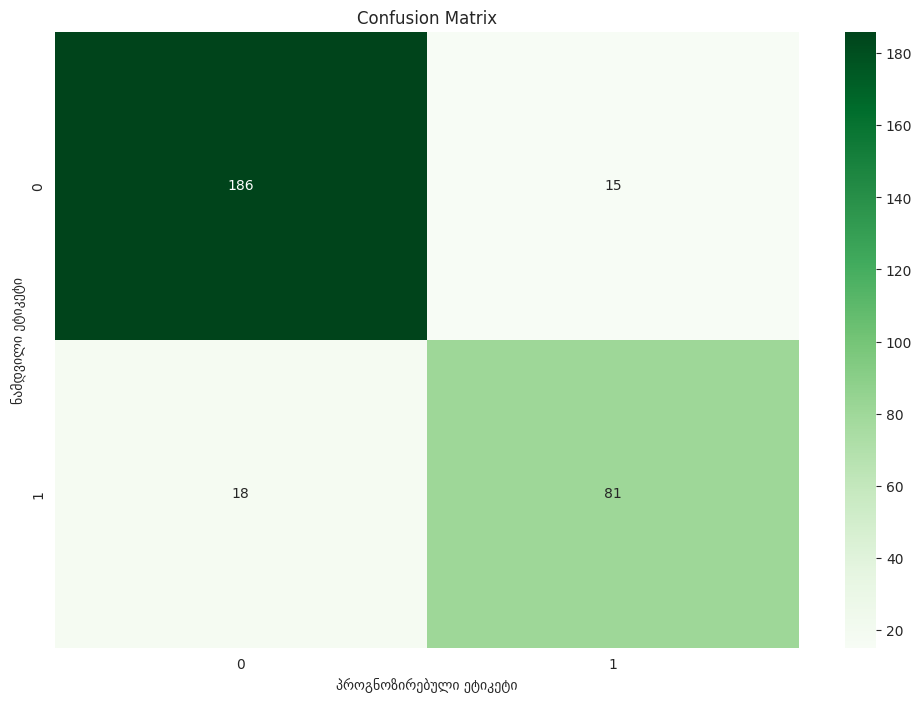

In [ ]:
# სატესტო მონაცემების დაბნეულობის მატრიცა

y_test_pred = log_reg_grid.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('პროგნოზირებული ეტიკეტი')
plt.ylabel('ნამდვილი ეტიკეტი')
plt.show()

**შეფასების მეტრიკების შედეგები Decision Tree-ის გამოყენებისას - სატრენინგო და სატესტო მონაცემებზე**

In [ ]:
# შეფასების მეტრიკების შედეგები Decision Tree-ის გამოყენებისას - სატრენინგო და სატესტო მონაცემებზე

evaluate_model(dt_grid.best_estimator_, X_train_scaled, y_train, "სატრენინგო")
evaluate_model(dt_grid.best_estimator_, X_test_scaled, y_test, "სატესტო")

სატრენინგო მონაცემებზე შეფასების შედეგები:
Precision: 0.9408
Recall: 0.9017
F1 Score: 0.9208
AUC: 0.9892
სატესტო მონაცემებზე შეფასების შედეგები:
Precision: 0.8351
Recall: 0.8182
F1 Score: 0.8265
AUC: 0.9193


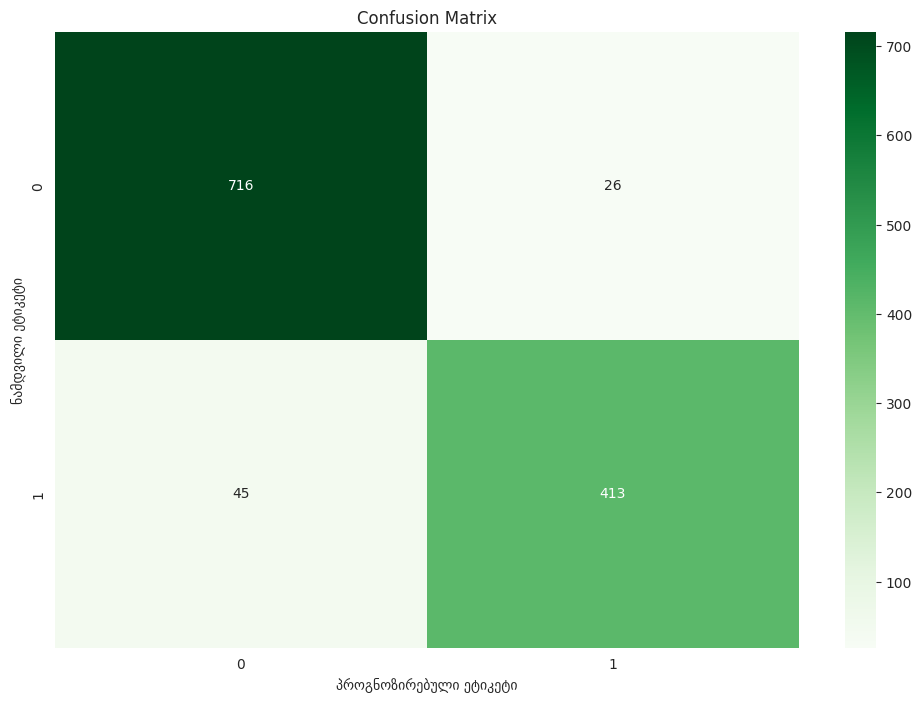

In [ ]:
# სატრენინგო მონაცემების დაბნეულობის მატრიცა

y_train_pred = dt_grid.predict(X_train_scaled)
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('პროგნოზირებული ეტიკეტი')
plt.ylabel('ნამდვილი ეტიკეტი')
plt.show()

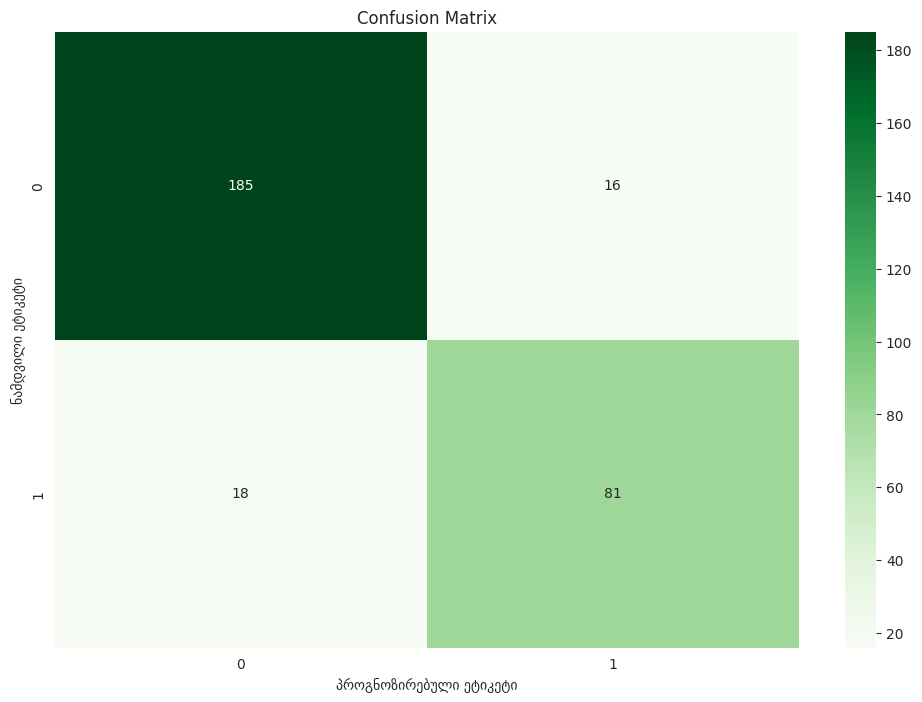

In [ ]:
# სატესტო მონაცემების დაბნეულობის მატრიცა

y_test_pred = dt_grid.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('პროგნოზირებული ეტიკეტი')
plt.ylabel('ნამდვილი ეტიკეტი')
plt.show()

**შეფასების მეტრიკების შედეგები Random Forest-ის გამოყენებისას - სატრენინგო და სატესტო მონაცემებზე**

In [ ]:
# შეფასების მეტრიკების შედეგები Random Forest-ის გამოყენებისას - სატრენინგო და სატესტო მონაცემებზე

evaluate_model(rf_grid.best_estimator_, X_train_scaled, y_train, "სატრენინგო")
evaluate_model(rf_grid.best_estimator_, X_test_scaled, y_test, "სატესტო")

სატრენინგო მონაცემებზე შეფასების შედეგები:
Precision: 0.9977
Recall: 0.9651
F1 Score: 0.9811
AUC: 0.9999
სატესტო მონაცემებზე შეფასების შედეგები:
Precision: 0.9278
Recall: 0.9091
F1 Score: 0.9184
AUC: 0.9665


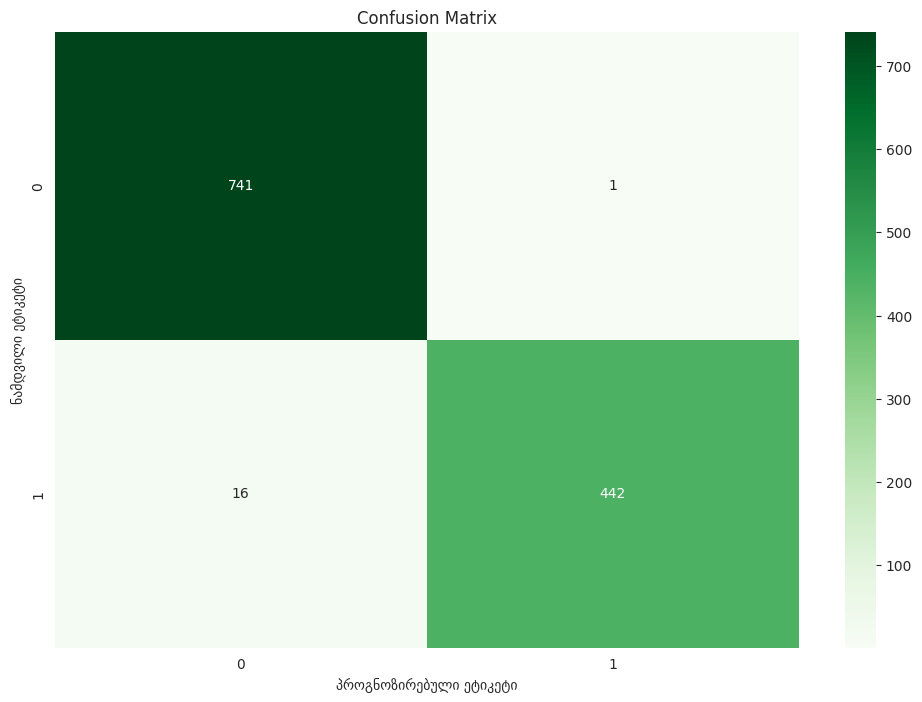

In [ ]:
# სატრენინგო მონაცემების დაბნეულობის მატრიცა

y_train_pred = rf_grid.predict(X_train_scaled)
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('პროგნოზირებული ეტიკეტი')
plt.ylabel('ნამდვილი ეტიკეტი')
plt.show()

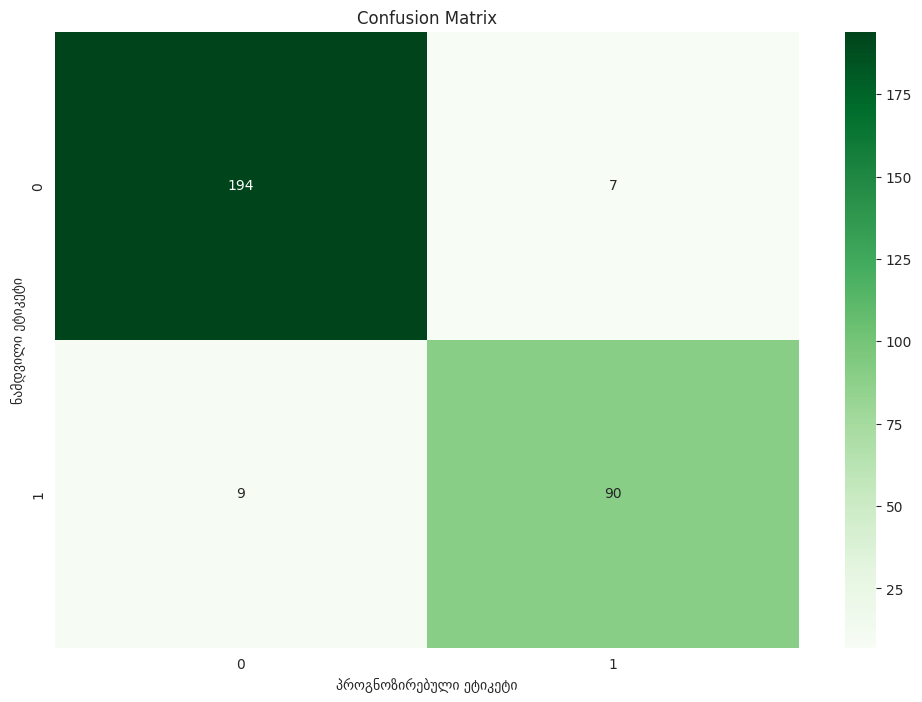

In [ ]:
# სატესტო მონაცემების დაბნეულობის მატრიცა

y_test_pred = rf_grid.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('პროგნოზირებული ეტიკეტი')
plt.ylabel('ნამდვილი ეტიკეტი')
plt.show()

**პასუხი**: ვინაიდან ჩვენი ამოცანის მიზანია შევქმნათ ისეთი ML მოდელი, რომელიც  განახორციელებს დიაგნოზის - სიმსივნის პროგნოზირებას და მნიშვნელოვანია დადებითი პროგნოზის სიზუსტე და მაქსიმალურად გამორიცხვა იმ შესაძლებლობის რომ ცრუ დადებითი შედეგი იპროგნოზიროს, აუცილებელია ოთხივე ზემოაღნიშნული მეტრიკის კომბინირებული შედარებით შევარჩიოთ საუკეთესო მოდელი.

როგორც ვხედავთ, შეფასების მეტრიკებში საუკეთესო შედეგი აქვს Random Forest ალგორითმის გამოყენებას. სხვა ალგორითმებთან შედარებით, ერთდროულად სიმსივნის პროგნოზირების მაღალი პროცენტული სიზუსტე და არასწორი დადებითი პროგნოზების მინიმალური ალბათობა ამ ალგორითმით მიიღწევა. სწორედ ამიტომ, საუკეთესო ალგორითმი იქნება Random Forest შემდეგი ჰიპერპარამეტრებით:

'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50
